In [132]:
import numpy as np
import matplotlib.pyplot as plt 
plt.rc('text',usetex=True)
plt.rc('font',family='serif')

Lx = 9.3717632253682877E+03
Ly = Lx
depth = 1000
rho_l = 1000
g = 9.81


# each HOS output is separated by 1.225 seconds

Setting the path

In [133]:
path = '../data_for_analysis/'

In [134]:
## Load the HOS data
HOSEnergy = np.genfromtxt(path+"HOS/vol_energy.dat",skip_header=36)

In [135]:
## Load the CFD data
CFDE_array512 = np.genfromtxt(path+"512_grid/we00000.txt",skip_header=1,delimiter='')
CFDE_array1024_1 = np.genfromtxt(path+"1024_grid/we00000.txt",skip_header=1,delimiter='')
CFDE_array1024_2 = np.genfromtxt(path+"1024_grid/we03653.txt",skip_header=1,skip_footer=10,delimiter='')

CFDE_mech512 = CFDE_array512[:,2]+CFDE_array512[:,3]
CFDE_mech1024_1 = (CFDE_array1024_1[:,2]+CFDE_array1024_1[:,3])/Lx/Ly/rho_l + 0.5*g*depth**2
CFDE_mech1024_2 = (CFDE_array1024_2[:,2]+CFDE_array1024_2[:,3])/Lx/Ly/rho_l + 0.5*g*depth**2

CFD_time512 = CFDE_array512[:,1]
CFDE_mech1024 = np.append(CFDE_mech1024_1,CFDE_mech1024_2)
CFD_time1024 = np.append(CFDE_array1024_1[:,1],CFDE_array1024_2[:,1])

#np.average(CFDE_mech512)
#HOSEnergy[200,4]
#CFDE_mech1024[0]
#HOSEnergy[0,4]

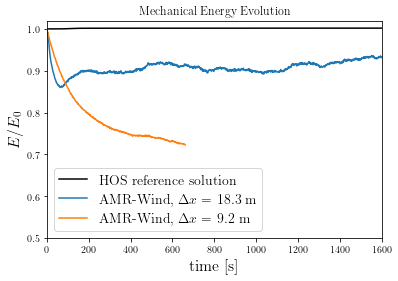

In [136]:
fig = plt.figure(1)
ME_ref = HOSEnergy[0,4]
plt.plot(HOSEnergy[:,0],HOSEnergy[:,4]/ME_ref,'k',label='HOS reference solution')
plt.plot(CFD_time512,CFDE_mech512/CFDE_mech512[0],label=r'AMR-Wind, $\Delta x$ = 18.3 m')
plt.plot(CFD_time1024,CFDE_mech1024/CFDE_mech1024[0],label=r'AMR-Wind, $\Delta x$ = 9.2 m')


plt.xlim(0,1600)
plt.xlabel(r'time [s]',fontsize=16)
plt.ylabel(r'$E/E_0$',fontsize=16)
plt.legend(fontsize=14)
plt.title('Mechanical Energy Evolution')
plt.ylim([0.5,1.02])
plt.savefig('Energy.png',format='png',dpi=100)

In [137]:
## Load the HOS spectra

A = np.genfromtxt(path+"HOS/a_3d.dat",skip_header=37)
B = np.genfromtxt(path+"HOS/a_3d_555.dat",skip_header=1, delimiter='')
C = np.genfromtxt(path+"HOS/a_3d_1304.dat",skip_header=1, delimiter='')


nx=129
ny=256

In [138]:
kx=np.zeros((nx,ny))
ky=np.zeros((nx,ny))
E0=np.zeros((nx,ny))
E1=np.zeros((nx,ny))
E2=np.zeros((nx,ny))
for i in range(nx):
    for j in range(ny):
        kx[i,j]=A[i+j*129,0]
        ky[i,j]=A[i+j*129,1]
        E0[i,j]=A[i+j*129,2]
        E1[i,j]=10**B[i+j*129,2]
        E2[i,j]=10**C[i+j*129,2]
    

In [139]:
## Load the CFD spectra

Dfinal = np.genfromtxt(path+"512_grid/fs06710.txt",skip_header=3,delimiter='')
nx=512
ny=512
X_512=np.zeros((nx,ny))
Y_512=np.zeros((nx,ny))
Eta_CFD_512_1=np.zeros((nx,ny))
for i in range(nx):
    for j in range(ny):
        X_512[i,j]=Dfinal[i+j*nx,0]
        Y_512[i,j]=Dfinal[i+j*nx,1]
        Eta_CFD_512_1[i,j]=Dfinal[i+j*nx,2]

In [140]:
## Load the CFD spectra

Dfinal = np.genfromtxt(path+"512_grid/fs16040.txt",skip_header=3,delimiter='')
nx=512
ny=512
X=np.zeros((nx,ny))
Y=np.zeros((nx,ny))
Eta_CFD_512_2=np.zeros((nx,ny))
for i in range(nx):
    for j in range(ny):
        X[i,j]=Dfinal[i+j*nx,0]
        Y[i,j]=Dfinal[i+j*nx,1]
        Eta_CFD_512_2[i,j]=Dfinal[i+j*nx,2]

In [155]:
## Load the CFD spectra

Dfinal = np.genfromtxt(path+"1024_grid/fs08100.txt",skip_header=3,delimiter='')
nx=1024
ny=1024
X_1024=np.zeros((nx,ny))
Y_1024=np.zeros((nx,ny))
Eta_CFD_1024=np.zeros((nx,ny))
for i in range(nx):
    for j in range(ny):
        X_1024[i,j]=Dfinal[i+j*nx,0]
        Y_1024[i,j]=Dfinal[i+j*nx,1]
        Eta_CFD_1024[i,j]=Dfinal[i+j*nx,2]


In [170]:

from scipy.signal import welch, csd, butter, lfilter, freqz
from scipy.stats import gamma
def PSD(frequency,TimeSeries,NumbModes):
    f, psd =welch(TimeSeries,fs=frequency,nperseg=NumbModes,scaling='spectrum')
    return f, psd

nx = 512
ny = nx

Nperseg=256
SamplingFreq=2*np.pi/(X_512[1,0]-X_512[0,0])
kxCFD, PhixCFDTotal=PSD(SamplingFreq,Eta_CFD_512_1[:,0],Nperseg)
for j in range(1,ny):
    kxCFD, PhixCFD=PSD(SamplingFreq,Eta_CFD_512_1[:,j],Nperseg)
    PhixCFDTotal=PhixCFDTotal+PhixCFD
    
PhixCFDTotal_512_1=PhixCFDTotal/(2*ny)

kyCFD, PhiyCFDTotal=PSD(SamplingFreq,Eta_CFD_512_1[0,:],Nperseg)
for i in range(1,nx):
    kyCFD, PhiyCFD=PSD(SamplingFreq,Eta_CFD_512_1[i,:],Nperseg)
    PhiyCFDTotal=PhiyCFDTotal+PhiyCFD
    
PhiyCFDTotal_512_1=PhiyCFDTotal/(4*nx)


In [171]:
nx = 512
ny = nx

Nperseg=256
SamplingFreq=2*np.pi/(X_512[1,0]-X_512[0,0])
kxCFD_512, PhixCFDTotal=PSD(SamplingFreq,Eta_CFD_512_2[:,0],Nperseg)
for j in range(1,ny):
    kxCFD_512, PhixCFD=PSD(SamplingFreq,Eta_CFD_512_2[:,j],Nperseg)
    PhixCFDTotal=PhixCFDTotal+PhixCFD
    
PhixCFDTotal_512_2=PhixCFDTotal/(2*ny)

kyCFD_512, PhiyCFDTotal=PSD(SamplingFreq,Eta_CFD_512_2[0,:],Nperseg)
for i in range(1,nx):
    kyCFD_512, PhiyCFD=PSD(SamplingFreq,Eta_CFD_512_2[i,:],Nperseg)
    PhiyCFDTotal=PhiyCFDTotal+PhiyCFD
    
PhiyCFDTotal_512_2=PhiyCFDTotal/(4*nx)

In [172]:

nx = 1024
ny = nx

Nperseg=512
SamplingFreq=2*np.pi/(X_1024[1,0]-X_1024[0,0])
kxCFD_1024, PhixCFDTotal=PSD(SamplingFreq,Eta_CFD_1024[:,0],Nperseg)
for j in range(1,ny):
    kxCFD_1024, PhixCFD=PSD(SamplingFreq,Eta_CFD_1024[:,j],Nperseg)
    PhixCFDTotal=PhixCFDTotal+PhixCFD
    
PhixCFDTotal_1024=PhixCFDTotal/(2*ny)

kyCFD_1024, PhiyCFDTotal=PSD(SamplingFreq,Eta_CFD_1024[0,:],Nperseg)
for i in range(1,nx):
    kyCFD_1024, PhiyCFD=PSD(SamplingFreq,Eta_CFD_1024[i,:],Nperseg)
    PhiyCFDTotal=PhiyCFDTotal+PhiyCFD
    
PhiyCFDTotal_1024=PhiyCFDTotal/(4*nx)

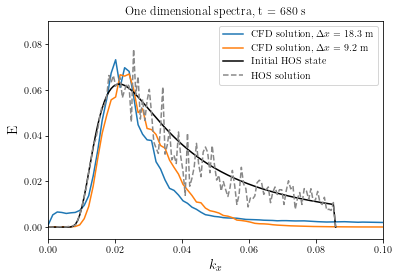

In [177]:
fig = plt.figure(2)
plt.title("One dimensional spectra, t = 680 s")
plt.plot(kxCFD_512,PhixCFDTotal_512_1,label=r'CFD solution, $\Delta x$ = 18.3 m')
plt.plot(kxCFD_1024,PhixCFDTotal_1024,label=r'CFD solution, $\Delta x$ = 9.2 m')
plt.plot(kx[:,127],E0[:,127],'k',label='Initial HOS state')
plt.plot(kx[:,127],E1[:,127],'--',color='#888',label='HOS solution')


plt.xlabel('$k_x$',fontsize=14)
plt.ylabel('E',fontsize=14)
plt.legend()
plt.xlim(0,0.1)
plt.ylim(-0.005,0.09)
plt.savefig("one_dimensional_spectra_x.png",bbox_inches=None)

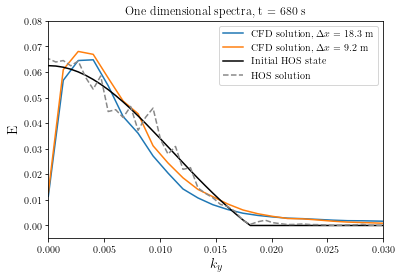

In [174]:
fig = plt.figure(3)
plt.title("One dimensional spectra, t = 680 s")
plt.plot(kyCFD_512,PhiyCFDTotal_512_1,label=r'CFD solution, $\Delta x$ = 18.3 m')
plt.plot(kyCFD_1024,PhiyCFDTotal_1024,label=r'CFD solution, $\Delta x$ = 9.2 m')
plt.plot(ky[32,:],E0[32,:],'k',label='Initial HOS state')
plt.plot(ky[32,:],E1[32,:],'--',color='#888',label='HOS solution')
plt.xlabel('$k_y$',fontsize=14)
plt.ylabel('E',fontsize=14)
plt.legend()
plt.ylim(-0.005,0.08)
plt.xlim(0,0.03)
plt.savefig("one_dimensional_spectra_y.png",bbox_inches=None)

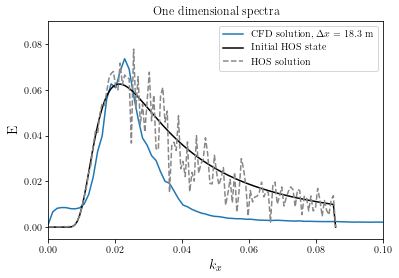

In [163]:
fig = plt.figure(2)
plt.title("One dimensional spectra")
plt.plot(kxCFD_512,PhixCFDTotal_512_2,label=r'CFD solution, $\Delta x$ = 18.3 m')
plt.plot(kx[:,127],E0[:,127],'k',label='Initial HOS state')
plt.plot(kx[:,127],E2[:,127],'--',color='#888',label='HOS solution')


plt.xlabel('$k_x$',fontsize=14)
plt.ylabel('E',fontsize=14)
plt.legend()
plt.xlim(0,0.1)
plt.ylim(-0.005,0.09)
plt.savefig("one_dimensional_spectra_x_later.png",bbox_inches=None)

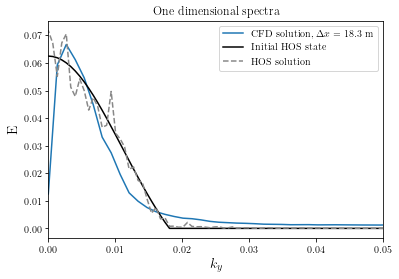

In [164]:
fig = plt.figure(3)
plt.title("One dimensional spectra")
plt.plot(kyCFD_512,PhiyCFDTotal_512_2,label=r'CFD solution, $\Delta x$ = 18.3 m')
plt.plot(ky[32,:],E0[32,:],'k',label='Initial HOS state')
plt.plot(ky[32,:],E2[32,:],'--',color='#888',label='HOS solution')
plt.xlabel('$k_y$',fontsize=14)
plt.ylabel('E',fontsize=14)
plt.legend()
plt.xlim(0,0.05)
plt.savefig("one_dimensional_spectra_y_later.png",bbox_inches=None)